In [ ]:
$ mkdir -p ~/aiffel/camera_sticker/models
$ mkdir -p ~/aiffel/camera_sticker/images
$ ln -s ~/data/* ~/aiffel/camera_sticker/images

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


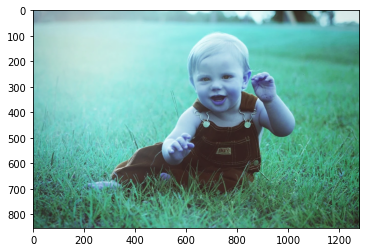

In [213]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/baby.jpg'
img_bgr = cv2.imread(my_image_path)    # 이미지 처리를 위해 OpenCV와 노트북에서 이미지 출력을 위한 matplotlib 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관, 준비한 이미지 읽기
plt.imshow(img_bgr)
plt.show()

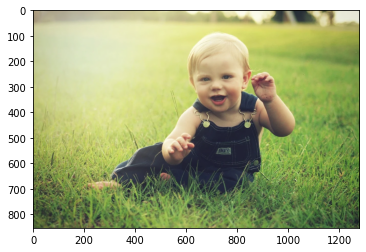

In [214]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
# matplotlib, dlib 등의 이미지 라이브러리는 이미지 채널을 RGB(빨강, 녹색, 파랑) 순으로 사용, 그런데 opencv는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용
# opencv에서 다룬 이미지를 다른 이미지 라이브러리를 활용하여 출력하려면 아래와 같은 색깔 보정처리를 해주게 된다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [215]:
# dlib을 활용해 hog detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [216]:
# detector_hog를 이용해서 얼굴의 bounding box를 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(613, 192) (835, 415)]]


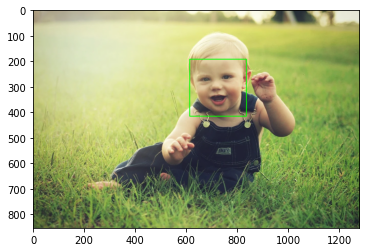

In [195]:
# 찾은 얼굴 영역 박스 리스트
# dlib detector 는 dlib.rectangles 타입의 객체를 반환, dlib.rectangles 는 dlib.rectangle 객체의 배열 형태로 이루어져 있다.
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # dlib.rectangle객체는 left(), top(), right(), bottom(), height(), width() 등의 멤버 함수를 포함

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
# Dlib의 제공되는 모델을 사용하기. 먼저 공개되어 있는 weight file을 다운로드, 해당 모델파일은 bz2 압축파일 형태로 제공되어 압축을 풀어준 후 사용
$ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
$ mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
$ cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

In [217]:
# 저장한 landmark 모델을 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")  # landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환한다.

🌫🛸


In [218]:
# points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있다. 조금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) # list_points 는 tuple (x, y) 68개로 이루어진 리스트가  된다. 
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


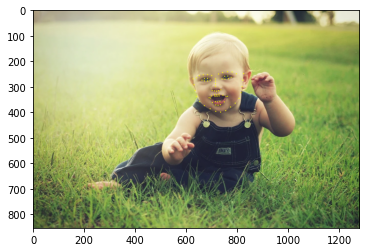

In [219]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()   # 랜드마크 영상 출력

In [220]:
# 스티커 적용하기
# 좌표 확인하기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30입니다
    x = landmark[30][0]
    y = landmark[8][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))  # 

(714, 298)
(x,y) : (714,287)
(w,h) : (223,223)


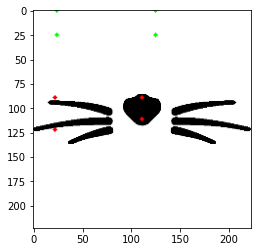

In [221]:
cat_list1 = [(w//2, int(w*0.4)), (int(w*0.1), int(w*0.4)), (int(w*0.1), int(w*0.55)), (w//2, w//2)]
cat_list2 = [(125,0),(24,0),(24,25),(125,25)]
for point in cat_list1:

    cv2.circle(sticker_copy, point, 2, (255, 0, 0), -1)
for point in cat_list2: 
    cv2.circle(sticker_copy, point, 2, (0, 255, 0), -1)
    
plt.imshow(sticker_copy)
plt.show()    


In [222]:
sticker_copy = img_sticker.copy()

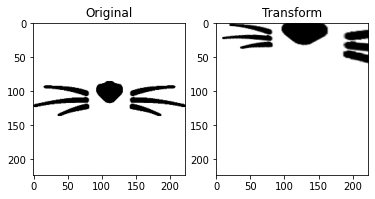

In [223]:
pts1 = np.float32(cat_list1) # 이동 전 스티커의 좌표
pts2 = np.float32(cat_list2) # 이동 후 스티커의 좌표
M = cv2.getPerspectiveTransform(pts1,pts2) # 변환시켜주는 매트릭스
dst = cv2.warpPerspective(img_sticker,M,(w,h), borderValue = [255, 255, 255, 255]) 
# 실제로 이미지를 M을 이용해 변환해주는 코드 # 회전시켰을 때 검은 배경을 없애기 위해 borderValue 설정
plt.subplot(121),plt.imshow(img_sticker),plt.title('Original')
plt.subplot(122),plt.imshow(dst,),plt.title('Transform')
plt.show()

In [224]:
refined_x = int(x - cat_list2[0][0])
refined_y = int(y - cat_list2[0][1]) # top

In [225]:
sticker_area2 = img_bgr[refined_y:refined_y+dst.shape[0], refined_x:refined_x+dst.shape[1]]
img_bgr[refined_y:refined_y+dst.shape[0], refined_x:refined_x+dst.shape[1]] = \
    np.where(dst==0, cv2.addWeighted(dst, 0.2, sticker_area2, 0.2, 0), sticker_area2).astype(np.uint8)

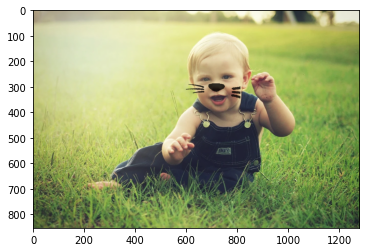

In [226]:
plt.subplot(),plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

In [227]:
# 김구라 사진에 고양이 수염 붙이기

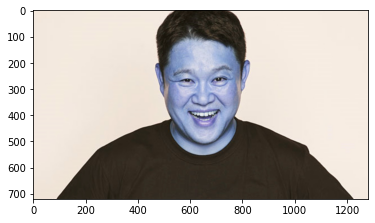

In [228]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_kim.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

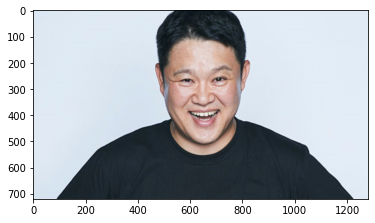

In [229]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [230]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [231]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(491, 170) (812, 491)]]


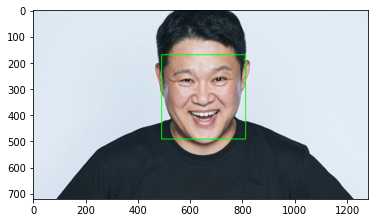

In [232]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [233]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [234]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


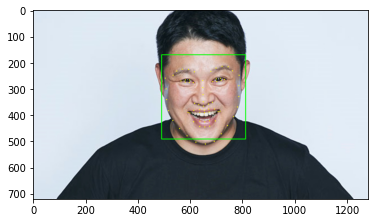

In [89]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [235]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] + dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(650, 349)
(x,y) : (650,510)
(w,h) : (322,322)


In [236]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat_수염.jpg.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(322, 322, 3)


In [237]:
refined_x = x - w // 2  # 사진경로 변경 후 수정
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) 

(x,y) : (489,188)


In [238]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (489,188)


In [239]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")


슝~


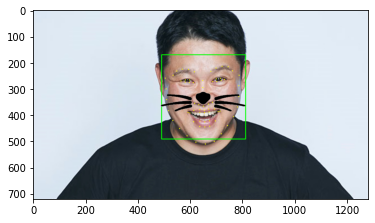

In [95]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 완성~~
# 회고>
# 처음에 아기 사진의 경우 고양이 수염스티커를 부착하고 하얀색 면이 나타나서 고민... 
#아기의 얼굴이 작아서  y = landmark[30][1] + dlib_rect.height()//2이 부분에서 나누는 값을 3으로도 해보고, 결국은 퍼실님의 도움으로 완성

# 김구라 사진은 노드에 있는데로 적용했고 아가 사진과 마찬가지로 하얀색 면이 나타났는데 이 부분에서 값을 0이 아닌 255로 수정해서 정리됨  np.where(img_sticker==255